<a href="https://colab.research.google.com/github/Butuz13/Final-project/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
file_hr = "/content/HR.csv"

In [68]:
df = pd.read_csv(file_hr)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
mean.values = df.mean()   # среднее значение

print(mean.values)

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64


<ipython-input-19-332a0f543ad4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean.values = df.mean()


In [20]:
median_values = df.median()    # медиана

print(median_values)

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64


<ipython-input-20-a280690b2a9b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


In [21]:
mode_values = df.mode().iloc[0]    # мода

print(mode_values)

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object


In [22]:
min_values = df.min()    # минимальное значение

print(min_values)

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object


In [23]:
max_values = df.max()    # максимальное значение

print(max_values)

satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object


In [24]:
std_values = df.std()    # среднее отклонение

print(std_values)

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64


<ipython-input-24-93b5a47fa094>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_values = df.std()


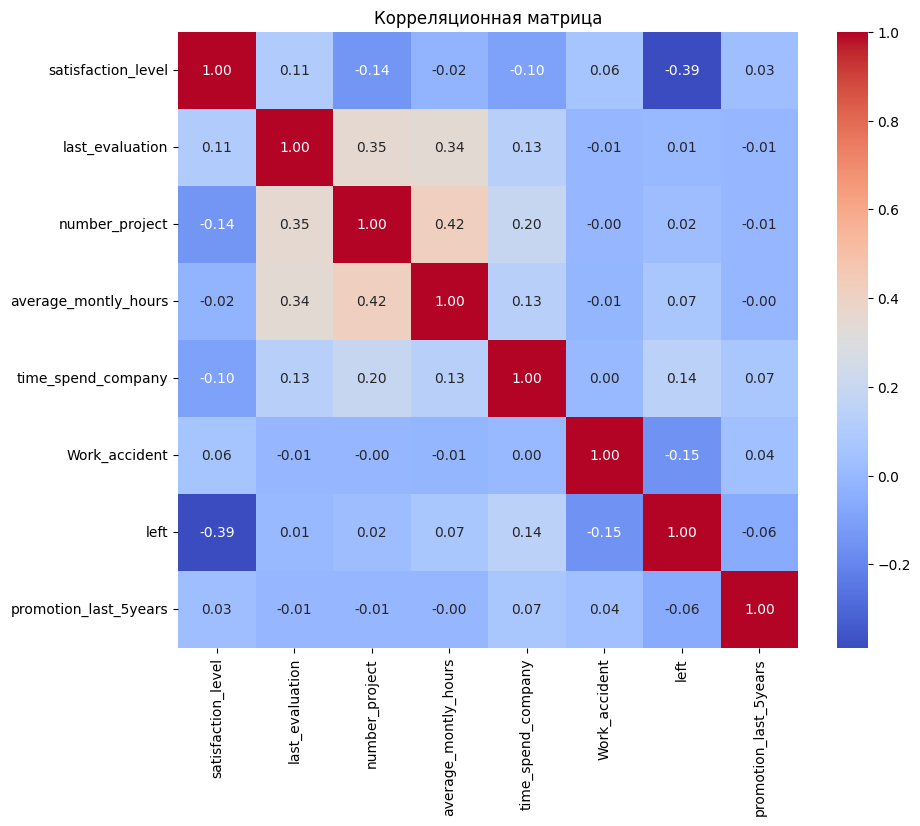

In [27]:
# Выбираем числовые переменные
numerical_variables = df.select_dtypes(include='number')

# Рассчитываем корреляционную матрицу
correlation_matrix = numerical_variables.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [28]:
employee_count_by_department = df['department'].value_counts() # количество сотрудников в каждом департаменте

print(employee_count_by_department)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


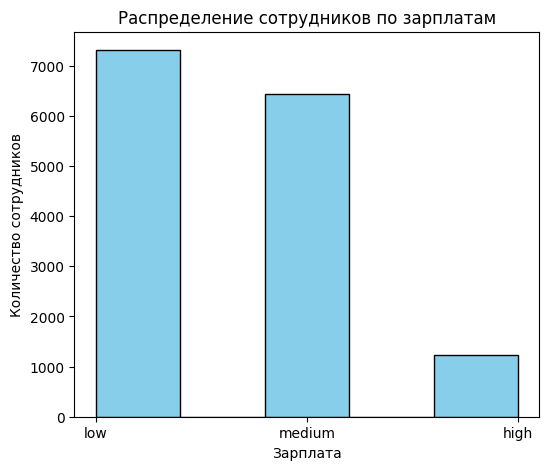

In [47]:
# Показать распределение сотрудников по зарплатам
plt.figure(figsize=(6, 5))
plt.hist(df['salary'],bins=5, edgecolor='black', color='skyblue')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.show()

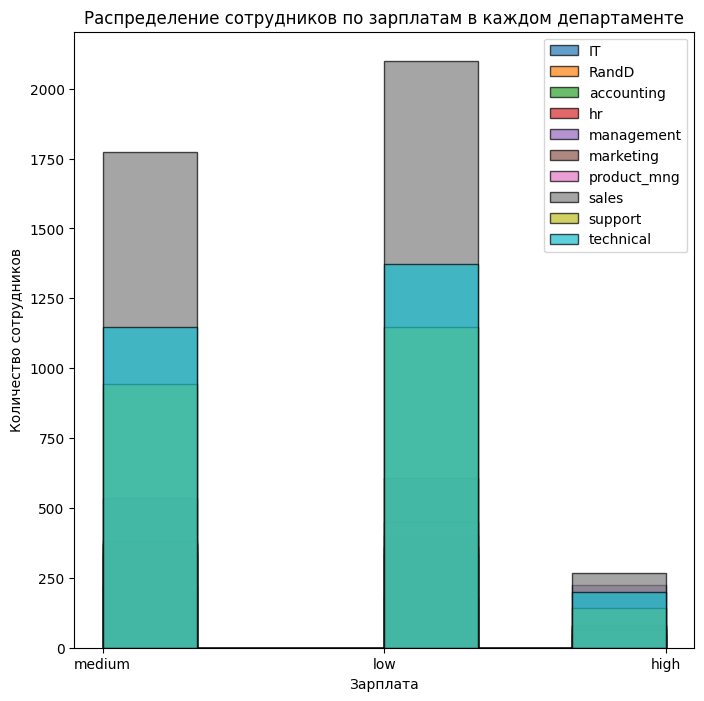

In [50]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
grouped_by_department = df.groupby('department')

plt.figure(figsize=(8, 8))
for department, data in grouped_by_department:
    plt.hist(data['salary'], bins=6, edgecolor='black', alpha=0.7, label=department)

plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.legend()
plt.show()

In [56]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,NaN
1,0.80,0.86,5,262,6,0,1,0,sales,NaN
2,0.11,0.88,7,272,4,0,1,0,sales,NaN
3,0.72,0.87,5,223,5,0,1,0,sales,NaN
4,0.37,0.52,2,159,3,0,1,0,sales,NaN


In [62]:
# Разделяем данные на две группы: сотрудники с высоким и низким окладом
high_salary_employees = df[df['salary'] == 'high']
low_salary_employees = df[df['salary'] == 'low']

# Выполняем t-тест для сравнения средних значений среднего количества часов на рабочем месте
t_stat, p_value = stats.ttest_ind(high_salary_employees['average_montly_hours'], low_salary_employees['average_montly_hours'])

# Выводим результаты t-теста
print("t-статистика:", t_stat)
print("p-значение:", p_value)

# Проверяем статистическую значимость гипотезы
if p_value < 0.05:
    print("Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.")
else:
    print("Нет статистически значимых различий во времени, проведенном на работе между сотрудниками с высоким и низким окладом.")



t-статистика: nan
p-значение: nan
Нет статистически значимых различий во времени, проведенном на работе между сотрудниками с высоким и низким окладом.


In [72]:
# Разделяем данные на две группы: уволившиеся и неуволившиеся сотрудники
left_employees = df[df['left'] == 1]  # уволившиеся сотрудники
not_left_employees = df[df['left'] == 0]  # неуволившиеся сотрудники

# Рассчитываем долю сотрудников с повышением за последние 5 лет
promotion_left = left_employees['promotion_last_5years'].mean()
promotion_not_left = not_left_employees['promotion_last_5years'].mean()

# Рассчитываем среднюю степень удовлетворенности
satisfaction_left = left_employees['satisfaction_level'].mean()
satisfaction_not_left = not_left_employees['satisfaction_level'].mean()

# Рассчитываем среднее количество проектов
projects_left = left_employees['number_project'].mean()
projects_not_left = not_left_employees['number_project'].mean()


print("Уволившиеся сотрудники:")
print("Доля сотрудников с повышением за последние 5 лет:", promotion_left)
print("Средняя степень удовлетворенности:", satisfaction_left)
print("Среднее количество проектов:", projects_left)

print("\nНеуволившиеся сотрудники:")
print("Доля сотрудников с повышением за последние 5 лет:", promotion_not_left)
print("Средняя степень удовлетворенности:", satisfaction_not_left)
print("Среднее количество проектов:", projects_not_left)


Уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194
Средняя степень удовлетворенности: 0.4400980117614114
Среднее количество проектов: 3.8555026603192384

Неуволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283
Средняя степень удовлетворенности: 0.666809590479524
Среднее количество проектов: 3.786664333216661


In [79]:
# Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли
# сотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

df = df.drop(['department', 'salary'], axis=1)

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop('left', axis=1)
y = df['left']

# Разделяем данные на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель LDA
lda = LDA()
lda.fit(X_train, y_train)

# Выполняем предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Точность модели на тестовой выборке:", accuracy)
print("Матрица ошибок:")
print(confusion)
print("Отчет по классификации:")
print(classification_report_str)


KeyError: ignored